OpenPyXL is a Python library used to read, write, and manipulate Excel files in the  format (Excel 2010 and later). It’s one of the most popular tools for handling spreadsheets programmatically when you don’t want to manually open Excel.

In [3]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import os

In [6]:
df = pd.read_csv("D:\GIT WORK AND STUDY\ML(PYTHON)\MACHINE-LEARNING\learning\instagram_usage_lifestyle.csv")
df.head()

,user_id,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,...,last_login_date,average_session_length_minutes,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score
0,1,Instagram,51,Female,India,Rural,High,Retired,Bachelor’s,Single,...,2025-11-02,5.0,Mixed,Tech,Private,Yes,No,0,Free,7.83
1,2,Instagram,64,Female,United Kingdom,Urban,Middle,Full-time employed,Other,Divorced,...,2025-03-22,14.8,Photos,Fashion,Public,No,No,3,Free,1.43
2,3,Instagram,41,Female,Canada,Urban,Middle,Student,Bachelor’s,In a relationship,...,2025-08-10,5.0,Mixed,Other,Public,Yes,Yes,1,Free,9.67
3,4,Instagram,27,Non-binary,South Korea,Urban,Middle,Unemployed,Master’s,In a relationship,...,2025-03-31,25.9,Stories,Tech,Private,No,No,1,Free,0.94
4,5,Instagram,55,Male,India,Urban,Upper-middle,Full-time employed,Bachelor’s,Single,...,2025-03-19,13.1,Videos,Food,Public,Yes,No,0,Free,1.03


In [7]:
df.columns

Index(['user_id', 'app_name', 'age', 'gender', 'country', 'urban_rural',
       'income_level', 'employment_status', 'education_level',
       'relationship_status', 'has_children', 'exercise_hours_per_week',
       'sleep_hours_per_night', 'diet_quality', 'smoking', 'alcohol_frequency',
       'perceived_stress_score', 'self_reported_happiness', 'body_mass_index',
       'blood_pressure_systolic', 'blood_pressure_diastolic',
       'daily_steps_count', 'weekly_work_hours', 'hobbies_count',
       'social_events_per_month', 'books_read_per_year',
       'volunteer_hours_per_month', 'travel_frequency_per_year',
       'daily_active_minutes_instagram', 'sessions_per_day',
       'posts_created_per_week', 'reels_watched_per_day',
       'stories_viewed_per_day', 'likes_given_per_day',
       'comments_written_per_day', 'dms_sent_per_week',
       'dms_received_per_week', 'ads_viewed_per_day', 'ads_clicked_per_day',
       'time_on_feed_per_day', 'time_on_explore_per_day',
       'time_on_

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547896 entries, 0 to 1547895
Data columns (total 58 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   user_id                         1547896 non-null  int64  
 1   app_name                        1547896 non-null  object 
 2   age                             1547896 non-null  int64  
 3   gender                          1547896 non-null  object 
 4   country                         1547896 non-null  object 
 5   urban_rural                     1547896 non-null  object 
 6   income_level                    1547896 non-null  object 
 7   employment_status               1547896 non-null  object 
 8   education_level                 1547896 non-null  object 
 9   relationship_status             1547896 non-null  object 
 10  has_children                    1547896 non-null  object 
 11  exercise_hours_per_week         1547896 non-null  float64
 12  

In [ ]:
df.describe() 
# daily_activity_minutes wil be main to analyze
#OTHER IMPORTANT COLUMNS:
# reels_watched_per_day
# time_on_feed_per_day , time_on_explore_per_day , time_on_messages_per_day , time_on_reels_per_day
# average_session_length_minutes


,user_id,age,exercise_hours_per_week,sleep_hours_per_night,perceived_stress_score,self_reported_happiness,body_mass_index,blood_pressure_systolic,blood_pressure_diastolic,daily_steps_count,...,time_on_explore_per_day,time_on_messages_per_day,time_on_reels_per_day,followers_count,following_count,notification_response_rate,account_creation_year,average_session_length_minutes,linked_accounts_count,user_engagement_score
count,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,...,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06
mean,7.739485e+05,3.898544e+01,7.143480e+00,6.999384e+00,1.998774e+01,5.499804e+00,2.500084e+01,1.244917e+02,7.950007e+01,8.000105e+03,...,3.762037e+01,3.295203e+01,5.647662e+01,2.160543e+03,2.604942e+03,5.002404e-01,2.017501e+03,2.050971e+01,1.975254e+00,1.644642e+00
std,4.468392e+05,1.529453e+01,3.994556e+00,1.097098e+00,1.183258e+01,2.871232e+00,3.976188e+00,2.020699e+01,1.154874e+01,8.939761e+01,...,2.535788e+01,2.144569e+01,3.534782e+01,3.402016e+03,2.751922e+03,2.887827e-01,4.611735e+00,8.697454e+00,1.352058e+00,1.812684e+00
min,1.000000e+00,1.300000e+01,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.500000e+01,9.000000e+01,6.000000e+01,7.566000e+03,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,2.000000e+01,0.000000e+00,2.010000e+03,5.000000e+00,0.000000e+00,6.700000e-01
25%,3.869748e+05,2.600000e+01,4.000000e+00,6.300000e+00,1.000000e+01,3.000000e+00,2.230000e+01,1.070000e+02,7.000000e+01,7.940000e+03,...,1.800000e+01,1.600000e+01,2.900000e+01,5.430000e+02,6.630000e+02,2.500000e-01,2.013000e+03,1.330000e+01,1.000000e+00,1.000000e+00
50%,7.739485e+05,3.900000e+01,6.600000e+00,7.000000e+00,2.000000e+01,5.000000e+00,2.500000e+01,1.240000e+02,7.900000e+01,8.000000e+03,...,3.400000e+01,3.100000e+01,5.400000e+01,1.154000e+03,1.519000e+03,5.000000e-01,2.017000e+03,2.040000e+01,2.000000e+00,1.100000e+00
75%,1.160922e+06,5.200000e+01,9.700000e+00,7.700000e+00,3.000000e+01,8.000000e+00,2.770000e+01,1.420000e+02,9.000000e+01,8.060000e+03,...,5.300000e+01,4.700000e+01,8.000000e+01,2.459000e+03,3.451000e+03,7.500000e-01,2.022000e+03,2.760000e+01,3.000000e+00,1.290000e+00
max,1.547896e+06,6.500000e+01,2.410000e+01,1.000000e+01,4.000000e+01,1.000000e+01,4.500000e+01,1.590000e+02,9.900000e+01,8.473000e+03,...,1.710000e+02,1.380000e+02,2.220000e+02,2.088110e+05,1.000000e+04,1.000000e+00,2.025000e+03,5.200000e+01,5.000000e+00,1.867000e+01


In [ ]:
df.isna().sum()
# no missing values

user_id                           0
app_name                          0
age                               0
gender                            0
country                           0
urban_rural                       0
income_level                      0
employment_status                 0
education_level                   0
relationship_status               0
has_children                      0
exercise_hours_per_week           0
sleep_hours_per_night             0
diet_quality                      0
smoking                           0
alcohol_frequency                 0
perceived_stress_score            0
self_reported_happiness           0
body_mass_index                   0
blood_pressure_systolic           0
blood_pressure_diastolic          0
daily_steps_count                 0
weekly_work_hours                 0
hobbies_count                     0
social_events_per_month           0
books_read_per_year               0
volunteer_hours_per_month         0
travel_frequency_per_year   

In [17]:
miss=df.isna().sum().sort_values(ascending=False)

Text(0, 0.5, 'User Count')

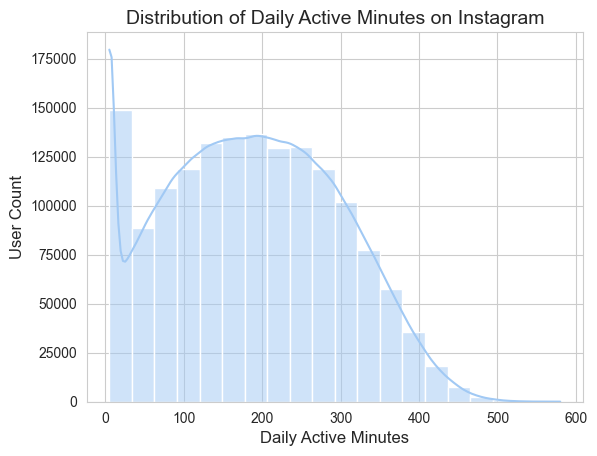

In [35]:
sns.set_style("whitegrid")  # Options: "darkgrid", "white", "ticks", "dark"
sns.set_palette("pastel")  # or try "muted", "deep", "bright"
sns.histplot(df['daily_active_minutes_instagram'], bins=20, kde=True)
plt.title("Distribution of Daily Active Minutes on Instagram", fontsize=14)
plt.xlabel("Daily Active Minutes", fontsize=12)
plt.ylabel("User Count", fontsize=12)